# Problem Statement
In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. The description of the dataset is as follows:

Data Set Information: Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Attribute Information: Listing of attributes:

50K, <=50K. age: continuous. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. fnlwgt: continuous. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. sex: Female, Male. capital-gain: continuous. capital-loss: continuous. hours-per-week: continuous. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. Following is the code to load required libraries and data: import numpy as np import pandas as pd train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.dat a', header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None) col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class'] train_set.columns = col_labels test_set.columns = col_labels

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

In [3]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

In [4]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class' ]

In [5]:
train_set.columns = col_labels

In [6]:
test_set.columns = col_labels

In [7]:
train_set =  pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names = col_labels)

In [8]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
train_set.shape 

(32561, 15)

In [10]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, names = col_labels)

In [11]:
test_set.shape

(16281, 15)

In [12]:
df = pd.concat([train_set, test_set], axis=0)
dff=df
k=df

In [13]:
df['income'] = df['wage_class'].apply(lambda x: 1 if x==' >50K' else 0)

for col in df.columns:
    if type(df[col][0]) == str:
        print("Working on " + col)
        df[col] = df[col].apply(lambda val: val.replace(" ",""))

Removing Unknown values

In [14]:
df.replace(' ?', np.nan, inplace=True)

In [15]:
df.shape

(48842, 16)

In [16]:
df = pd.concat([df, pd.get_dummies(df['workclass'],prefix='workclass',prefix_sep=':')], axis=1)
df.drop('workclass',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['marital_status'],prefix='marital_status',prefix_sep=':')], axis=1)
df.drop('marital_status',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['occupation'],prefix='occupation',prefix_sep=':')], axis=1)
df.drop('occupation',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['relationship'],prefix='relationship',prefix_sep=':')], axis=1)
df.drop('relationship',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['race'],prefix='race',prefix_sep=':')], axis=1)
df.drop('race',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['sex'],prefix='sex',prefix_sep=':')], axis=1)
df.drop('sex',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['native_country'],prefix='native_country',prefix_sep=':')], axis=1)
df.drop('native_country',axis=1,inplace=True)

df.drop('education', axis=1,inplace=True)

df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,income,workclass: Federal-gov,workclass: Local-gov,...,native_country: Portugal,native_country: Puerto-Rico,native_country: Scotland,native_country: South,native_country: Taiwan,native_country: Thailand,native_country: Trinadad&Tobago,native_country: United-States,native_country: Vietnam,native_country: Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.isnull().sum()

age                                           0
fnlwgt                                        0
education_num                                 0
capital_gain                                  0
capital_loss                                  0
hours_per_week                                0
wage_class                                    0
income                                        0
workclass: Federal-gov                        0
workclass: Local-gov                          0
workclass: Never-worked                       0
workclass: Private                            0
workclass: Self-emp-inc                       0
workclass: Self-emp-not-inc                   0
workclass: State-gov                          0
workclass: Without-pay                        0
marital_status: Divorced                      0
marital_status: Married-AF-spouse             0
marital_status: Married-civ-spouse            0
marital_status: Married-spouse-absent         0
marital_status: Never-married           

In [18]:
df.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass: Federal-gov,workclass: Local-gov,workclass: Never-worked,...,native_country: Portugal,native_country: Puerto-Rico,native_country: Scotland,native_country: South,native_country: Taiwan,native_country: Thailand,native_country: Trinadad&Tobago,native_country: United-States,native_country: Vietnam,native_country: Yugoslavia
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.178818,0.049867,0.057935,-0.019564,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006871,-0.009996,0.001233,0.003438,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
education_num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.260855,0.058072,0.097210,-0.014350,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
capital_gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.171772,-0.003633,-0.009872,-0.002072,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
capital_loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.116651,0.009221,0.009504,-0.003107,...,-0.008047,0.002636,-0.004503,0.005638,0.003078,-0.002338,0.004028,0.009449,-0.000118,-0.004713
hours_per_week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.178245,0.015300,0.008981,-0.013307,...,0.005433,-0.006978,0.002083,0.009526,-0.003012,0.008558,-0.002911,0.004390,-0.008289,-0.000359
income,0.178818,-0.006871,0.260855,0.171772,0.116651,0.178245,1.000000,0.046651,0.025836,-0.006258,...,-0.010180,-0.015967,-0.000999,-0.002833,0.014633,-0.004088,-0.005539,0.024686,-0.011715,0.005932
workclass: Federal-gov,0.049867,-0.009996,0.058072,-0.003633,0.009221,0.015300,0.046651,1.000000,-0.045524,-0.002487,...,-0.003162,0.009123,-0.003604,-0.003435,-0.006344,-0.004309,0.001076,0.013956,-0.001509,-0.003772
workclass: Local-gov,0.057935,0.001233,0.097210,-0.009872,0.009504,0.008981,0.025836,-0.045524,1.000000,-0.003748,...,-0.005195,0.001617,-0.005433,-0.012725,-0.004980,-0.003123,0.000947,0.034874,-0.003032,-0.001836
workclass: Never-worked,-0.019564,0.003438,-0.014350,-0.002072,-0.003107,-0.013307,-0.006258,-0.002487,-0.003748,1.000000,...,-0.000530,-0.000880,-0.000297,-0.000695,-0.000522,-0.000355,-0.000337,0.004838,-0.000601,-0.000311


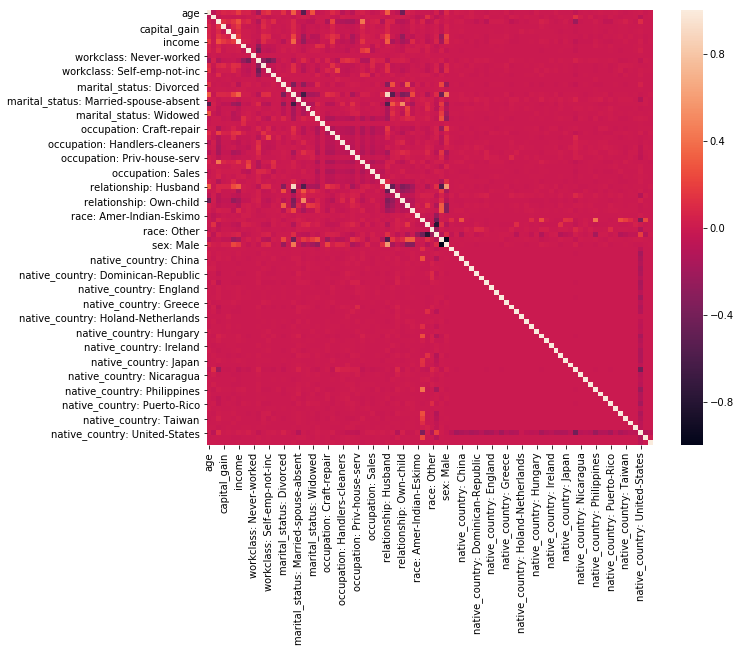

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

Preparing data for Training and testing

In [20]:
X = np.array(df.drop(['income','wage_class'], 1))

In [21]:
y = np.array(df['income'])
X = preprocessing.scale(X)
y = np.array(df['income'])

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
#Splitting data as train and test data 
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

## XGB experiementing with learning rate
This code is to let algorithm figure out itself, which value for learning rate is best

In [ ]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

In [ ]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
from matplotlib import pyplot
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost learning_rate vs Log Loss")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('learning_rate.png')

#### This xgboost code is where we experiment which learning rate and what number of estimators are BEST


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import numpy
from matplotlib import pyplot
from pandas import read_csv

In [ ]:
model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", cv=kfold)
grid_result = grid_search.fit(X_train, y_train)



In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# plot results
scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_learning_rate.png')

 XGboost - Picking the best values for learning rate and estimators  


In [ ]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier(learning_rate=0.1,
                           n_estimators=500,
                           max_depth=5,
                           min_child_weight=4
                           )
final_m=model.fit(X_train, y_train)
xgb.plot_importance(final_m)

In [ ]:
plt.show()
predictions = model.predict(X_test)
print("training set auc:",accuracy_score(y_test, predictions))
predictions = model.predict(X_test)
print("test set auc:",accuracy_score(y_test, predictions))
print(model.get_params())

In [ ]:
XGBA = accuracy_score(y_test, predictions)
print("The Accuracy  is {}".format(XGBA))